In [1]:
from qiskit import *

In [2]:
# create a single qubit circuit, the default initial state will be |0>
qc = QuantumCircuit(2)

In [3]:
# Apply X (X) H - "X" of "H", so "H" first, then "X"
qc.h(0)
qc.x(1)

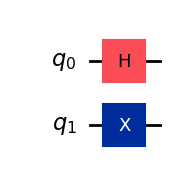

In [4]:
# Draw with MatplotLib drawer ('mpl')
qc.draw('mpl')

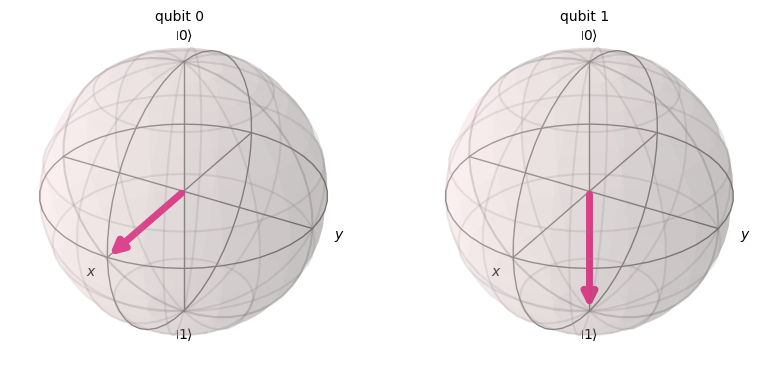

In [5]:
from qiskit.primitives import Estimator, Sampler
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector, visualize_transition

# Run the simulation
simulator = StatevectorSimulator()
job = simulator.run([qc])
result = job.result()

dir(result)

# extract the statevector
# statevector = result.quasi_dists[0].get_statevector()
statevector = result.get_statevector()

# Plot with Bloch multivector
plot_bloch_multivector(statevector)

In [6]:
from qiskit.visualization import array_to_latex
import numpy as np
columnvector = np.asarray(statevector.reshape(-1, 1))
array_to_latex(columnvector, prefix="Statevector = ")

/var/folders/b5/3z7ssmcj4nj10sz7p6kd58wm0000gp/T/ipykernel_50068/3113374394.py:3: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  columnvector = np.asarray(statevector.reshape(-1, 1))


<IPython.core.display.Latex object>

In [7]:
# from IPython.display import display, Math

# # Convert to symbolic expressions for nicer formatting
# def format_complex_as_latex(complex_num):
#     # Handle common quantum values like 1/sqrt(2)
#     if abs(abs(complex_num) - 1/np.sqrt(2)) < 1e-8:
#         if complex_num.real > 0 and abs(complex_num.imag) < 1e-8:
#             return "\\frac{1}{\\sqrt{2}}"
#         elif complex_num.real < 0 and abs(complex_num.imag) < 1e-8:
#             return "-\\frac{1}{\\sqrt{2}}"
#         # Add cases for imaginary components if needed
    
#     # Handle zero values
#     if abs(complex_num) < 1e-8:
#         return "0"
    
#     # Handle ones
#     if abs(complex_num - 1) < 1e-8:
#         return "1"
#     if abs(complex_num + 1) < 1e-8:
#         return "-1"
    
#     # Default case - use sympy to format nicely
#     return sp.latex(sp.sympify(complex(complex_num)))

# # Apply formatting to the entire matrix
# def format_matrix_as_latex(matrix, prefix="Unitary = "):
#     rows, cols = matrix.shape
    
#     # Start LaTeX matrix
#     latex_str = "\\begin{bmatrix}\n"
    
#     # Format each row
#     for i in range(rows):
#         row_str = " & ".join([format_complex_as_latex(matrix[i, j]) for j in range(cols)])
#         latex_str += row_str
        
#         # Add line break for all but the last row
#         if i < rows - 1:
#             latex_str += " \\\\\n"
    
#     # End LaTeX matrix
#     latex_str += "\n\\end{bmatrix}"
    
#     # Display with prefix
#     return Math(f"\\text{{{prefix}}} {latex_str}")

In [8]:
from qiskit_aer import UnitarySimulator
from array_visualization import unitary_to_latex

simulator = UnitarySimulator()
result = simulator.run(qc).result()
unitary = np.asarray(result.get_unitary(qc))
m,n = unitary.shape
unitary = unitary.reshape(n, m)

unitary_to_latex(unitary)

<IPython.core.display.Math object>

In [9]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram


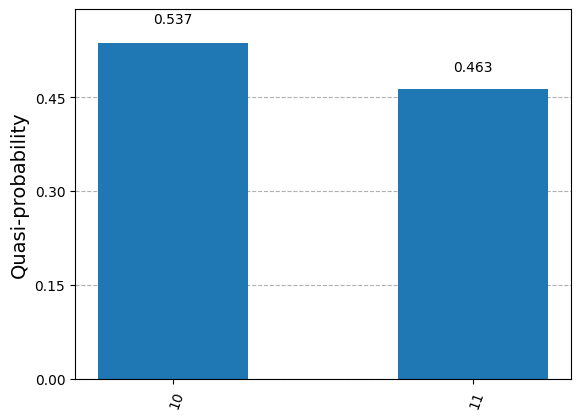

In [10]:

qc.measure_all()

#run the sampler
sampler = Sampler()
job = sampler.run([qc], shots=1024)
result = job.result()
# Access the counts through the quasi_dists attribute
# This returns a dictionary with bitstring integers as keys
quasi_dist = result.quasi_dists[0]

# Convert to the format expected by plot_histogram
# The keys need to be binary strings
counts_dict = {format(int(k), f'0{qc.num_clbits}b'): v * result.metadata[0].get('shots', 1024) 
               for k, v in quasi_dist.items()}

# Plot the histogram
plot_histogram(counts_dict)
